In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

In [2]:
from datetime import date
start = "2015-01-01"
end = date.today().strftime("%Y-%m-%d")
df = yf.download("TSLA", start=start, end=end)
print(df.tail(10))

C:\Users\FTT\AppData\Local\Temp\ipykernel_17080\3786553263.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2025-12-12  458.959991  463.010010  441.670013  448.089996   95656700
2025-12-15  475.309998  481.769989  467.660004  469.440002  114542200
2025-12-16  489.880005  491.500000  465.829987  472.209991  107608100
2025-12-17  467.260010  495.279999  466.200012  488.220001  106490400
2025-12-18  483.369995  490.859985  473.119995  478.160004   95168400
2025-12-19  481.200012  490.489990  474.720001  488.119995  103305400
2025-12-22  488.730011  498.829987  485.329987  489.880005   86916100
2025-12-23  485.559998  491.970001  482.839996  489.399994   58223600
2025-12-24  485.399994  490.899994  476.799988  488.480011   41285400
2025-12-26  475.190002  489.089996  473.820007  485.230011   58521400


In [3]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [4]:
df = df.drop(['Date'],axis=1)
df.head(10)

C:\Users\FTT\AppData\Local\Temp\ipykernel_17080\655916378.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,14.620667,14.883333,14.217333,14.858000,71466000
1,14.006000,14.433333,13.810667,14.303333,80527500
2,14.085333,14.280000,13.614000,14.004000,93928500
3,14.063333,14.318667,13.985333,14.223333,44526000
4,14.041333,14.253333,14.000667,14.187333,51637500
5,13.777333,13.998667,13.664000,13.928000,70024500
6,13.480667,13.631333,13.283333,13.536667,89254500
7,13.616667,13.840667,13.394000,13.554667,67159500
8,12.846000,13.013333,12.333333,12.388667,173278500


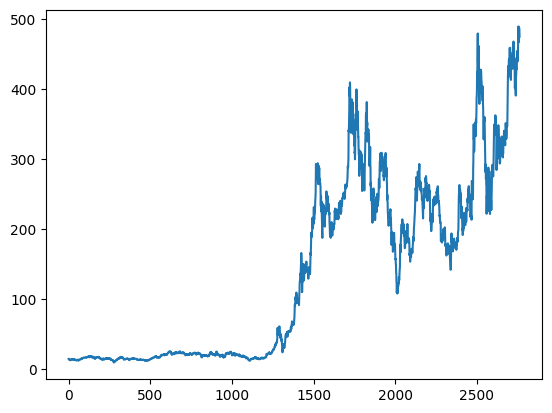

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2758,406.4764
2759,408.2810
2760,410.1103
2761,411.8717


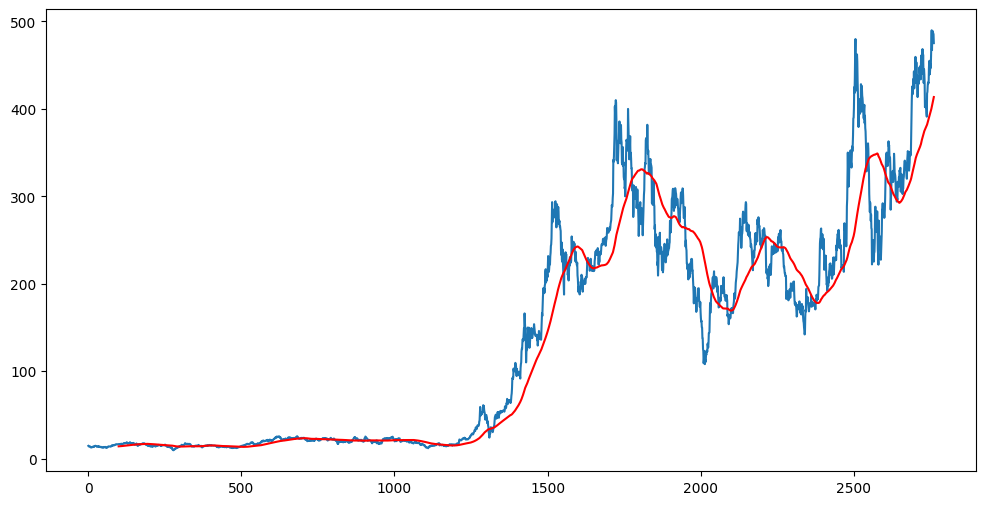

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [8]:
ma200 = df.Close.rolling(200).mean()

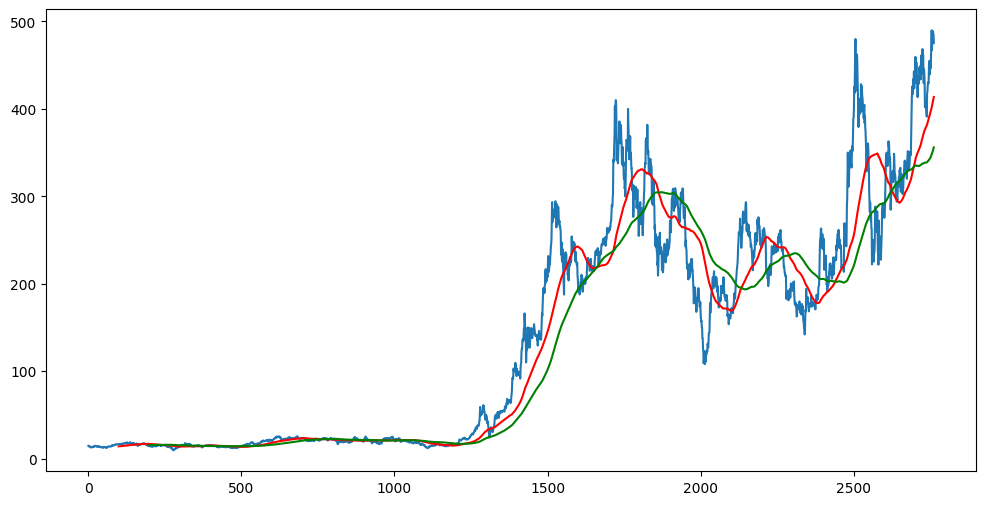

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
df.shape

(2763, 5)

In [11]:
df.dropna(inplace=True)

spliting of data

In [12]:
# from sklearn.model_selection import train_test_split

# y = df['Close']

# y_train, y_test = train_test_split(y,test_size=0.3,random_state=42)
# y_train.shape,y_test.shape

data_train = pd.DataFrame(df.Close[0:int(len(df)*0.80)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.80):len(df)])

In [13]:
data_train.shape[0]

2210

In [14]:
data_test.shape[0]

553

In [15]:
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler
# scaler = MaxAbsScaler()
scaler = MinMaxScaler(feature_range=(0,1))

y_train_scaler = scaler.fit_transform(data_train)
y_train_scaler

array([[0.01259433],
       [0.01105916],
       [0.0112573 ],
       ...,
       [0.63448319],
       [0.63290972],
       [0.62261982]], shape=(2210, 1))

In [16]:
x_train = []
y_train1 = []

for i in range(100,y_train_scaler.shape[0]):
    x_train.append(y_train_scaler[i-100:i])
    y_train1.append(y_train_scaler[i,0])

x_train, y_train1 = np.array(x_train), np.array(y_train1)

In [17]:
x_train.shape

(2110, 100, 1)

In [18]:
y_train1.shape

(2110,)

ML Model

In [19]:
from keras.layers import Dense, Dropout, LSTM,Input
from keras.models import Sequential

In [20]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential()

# model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape = ((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


c:\Users\FTT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train1,epochs=50)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - loss: 0.0265
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0069
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - loss: 0.0072
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - loss: 0.0061
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - loss: 0.0056
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 0.0062
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0055
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 0.0049
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 0.0053
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - loss: 0.0045
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - loss: 0.0049
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - loss: 0.0047
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - loss: 0.0040
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - loss: 0.0043
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [23]:
model.save('keras_model.keras')

In [24]:
data_test.head()

Ticker,TSLA
2210,251.119995
2211,253.919998
2212,254.850006
2213,242.679993
2214,220.110001


In [25]:
past_100_day = data_train.tail(100)

In [26]:
final_df = pd.concat([past_100_day, data_test], ignore_index=True)

In [27]:
final_df.head()

Ticker,TSLA
0,188.869995
1,185.770004
2,182.899994
3,184.470001
4,193.169998


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13460596],
       [0.12569359],
       [0.1174424 ],
       [0.12195612],
       [0.14696833],
       [0.16993934],
       [0.17790297],
       [0.18822413],
       [0.20676767],
       [0.21723255],
       [0.22786992],
       [0.23724234],
       [0.26682574],
       [0.29425291],
       [0.30986401],
       [0.33539369],
       [0.3298738 ],
       [0.32731504],
       [0.34065493],
       [0.38064574],
       [0.33754992],
       [0.35235598],
       [0.32932755],
       [0.2846218 ],
       [0.31095651],
       [0.32829252],
       [0.33191501],
       [0.34419109],
       [0.3960843 ],
       [0.40373173],
       [0.38665441],
       [0.38058819],
       [0.36673082],
       [0.36724838],
       [0.37357326],
       [0.39056433],
       [0.40056925],
       [0.42644396],
       [0.43495384],
       [0.42897394],
       [0.34743981],
       [0.33915989],
       [0.36514962],
       [0.35428225],
       [0.35160855],
       [0.32676883],
       [0.35761722],
       [0.360

In [29]:
input_data.shape

(653, 1)

In [30]:
x_test1 = []
y_test2 = []

for i in range(100,input_data.shape[0]):
    x_test1.append(input_data[i-100:i])
    y_test2.append(input_data[i,0])

In [31]:
x_test1 , y_test2 = np.array(x_test1), np.array(y_test2)

In [32]:
x_test1.shape,y_test2.shape

((553, 100, 1), (553,))

In [33]:
y_predicted = model.predict(x_test1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step


In [34]:
y_predicted.shape

(553, 1)

In [35]:
y_test2.shape

(553,)

In [36]:
scale_val = scaler.scale_

In [37]:
scale_factor = 1/scale_val
y_predicted = y_predicted * scale_factor
y_test2 = y_test2 * scale_factor

In [38]:
y_predicted

array([[117.74062944],
       [118.41352681],
       [118.57450262],
       [118.34391816],
       [117.73312435],
       [116.65971036],
       [115.19686116],
       [113.48876977],
       [111.701989  ],
       [109.96652063],
       [108.34546336],
       [106.86976014],
       [105.52722038],
       [104.31168659],
       [103.23250902],
       [102.32072392],
       [101.59033593],
       [101.03890901],
       [100.65848197],
       [100.4327385 ],
       [100.30558741],
       [100.23781357],
       [100.22654557],
       [100.31496876],
       [100.56253296],
       [100.95525425],
       [101.45925606],
       [102.0378941 ],
       [102.68938539],
       [103.35390691],
       [103.98520495],
       [104.55775806],
       [105.1402523 ],
       [105.76728986],
       [106.39878485],
       [106.97437525],
       [107.42609024],
       [107.75426156],
       [107.98555092],
       [108.17826786],
       [108.38412907],
       [108.58603042],
       [108.73365464],
       [108

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test2, y_predicted)
mse = mean_squared_error(y_test2, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_predicted)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 23.627655575556307
MSE: 862.1905119975677
RMSE: 29.363080764755725
R2 Score: 0.8961355378673077


Text(0, 0.5, 'Price')

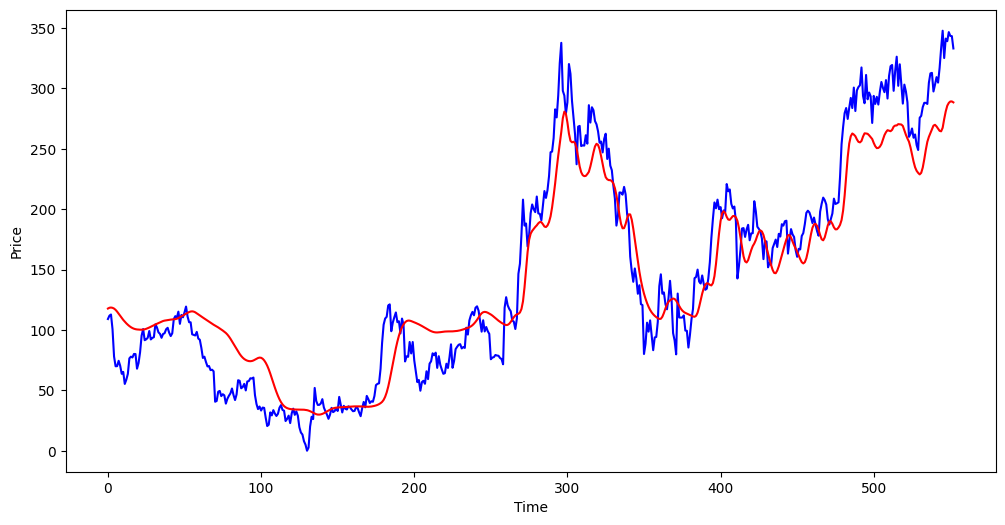

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test2, color='b',label="Original_price")
plt.plot(y_predicted,color='r',label='Predicted_price')
plt.xlabel('Time')
plt.ylabel('Price')